# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
City not found. Skipping...
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | alvarado
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | walvis bay
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | savanna-la-mar
City not found. Skipping...
Processing Record 14 of Set 1 | ghadamis
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | marvdasht
City not found. Skipping...
Processing Record 17 of Set 1 | la passe
City not found. Skipping...
Processing Record 18 of Set 1 | bandon
Processing Record 19 of Set 1 | atafu v

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()


City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazacorte,28.6290,-17.9293,16.54,77,40,4.63,ES,1705731538
1,fale old settlement,-9.3852,-171.2468,29.28,71,69,5.34,TK,1705731544
2,as sulayyil,20.4607,45.5779,17.14,32,22,5.28,SA,1705731547
3,mount pearl,47.5166,-52.7813,-3.25,84,100,3.09,CA,1705731553
4,howard springs,-12.4970,131.0470,30.49,79,100,7.13,AU,1705731554


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,16.54,77,40,4.63,ES,1705731538
1,fale old settlement,-9.3852,-171.2468,29.28,71,69,5.34,TK,1705731544
2,as sulayyil,20.4607,45.5779,17.14,32,22,5.28,SA,1705731547
3,mount pearl,47.5166,-52.7813,-3.25,84,100,3.09,CA,1705731553
4,howard springs,-12.4970,131.0470,30.49,79,100,7.13,AU,1705731554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

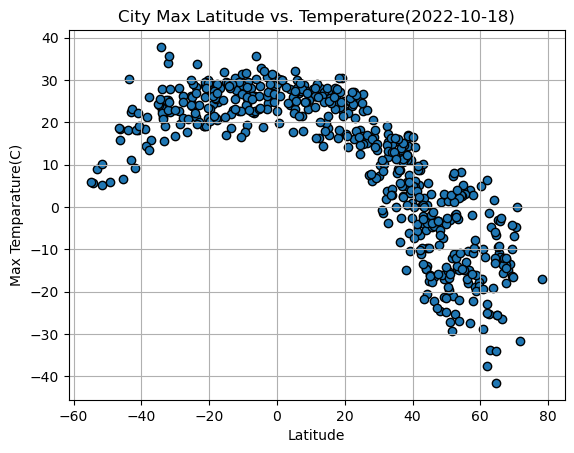

In [26]:
# Build scatter plot for latitude vs. temperature
lat_temp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temparature(C)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

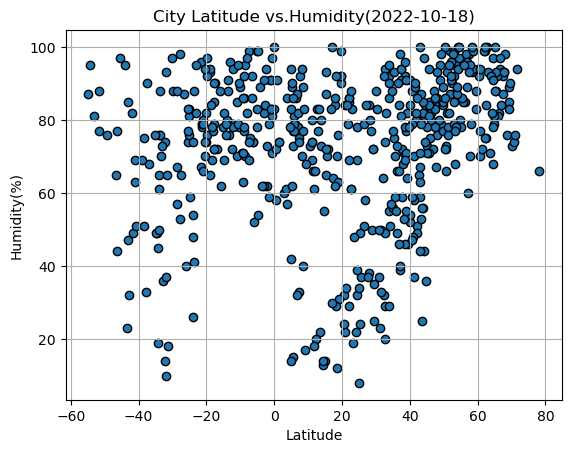

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs.Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

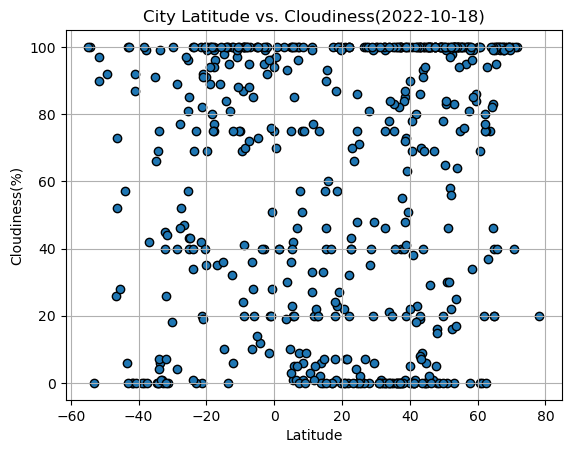

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

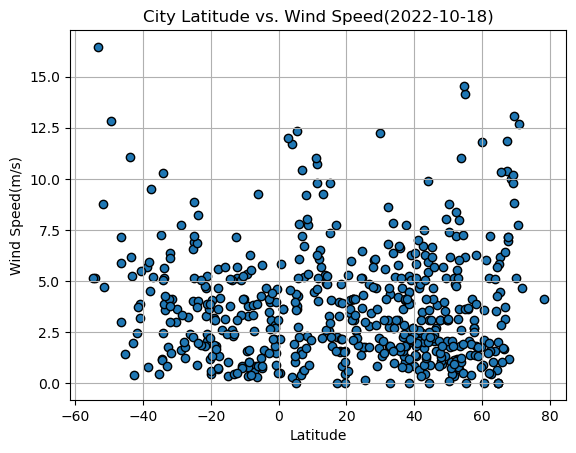

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
from scipy import stats


In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,16.54,77,40,4.63,ES,1705731538
2,as sulayyil,20.4607,45.5779,17.14,32,22,5.28,SA,1705731547
3,mount pearl,47.5166,-52.7813,-3.25,84,100,3.09,CA,1705731553
6,petropavlovsk-kamchatsky,53.0452,158.6483,-2.53,95,100,3.13,RU,1705731558
7,pierre,44.3683,-100.3510,-20.49,84,0,0.00,US,1705731561


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fale old settlement,-9.3852,-171.2468,29.28,71,69,5.34,TK,1705731544
4,howard springs,-12.4970,131.0470,30.49,79,100,7.13,AU,1705731554
5,sao felix do xingu,-6.6447,-51.9950,22.31,92,36,0.81,BR,1705731557
8,edinburgh of the seven seas,-37.0676,-12.3116,15.86,68,42,5.19,SH,1705731563
9,port-aux-francais,-49.3500,70.2167,6.02,76,92,12.81,TF,1705731569


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7398959271337053


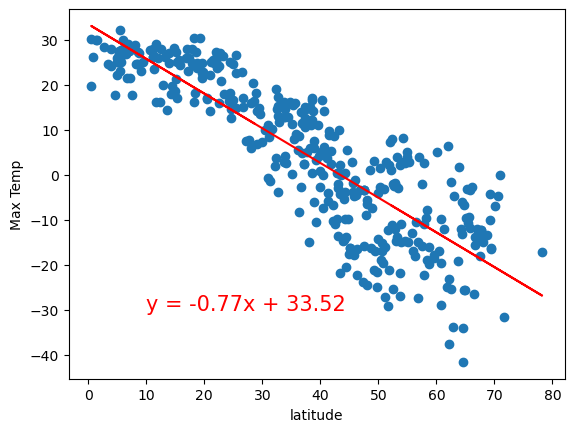

In [101]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("latitude")
plt.ylabel("Max Temp")
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope*x_values + intercept
#creating line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
#plotting the line 
plt.plot(x_values, regress_values, color = "red")
plt.annotate(line_eq, (10,-30), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

The r-value is : 0.32440998936349663


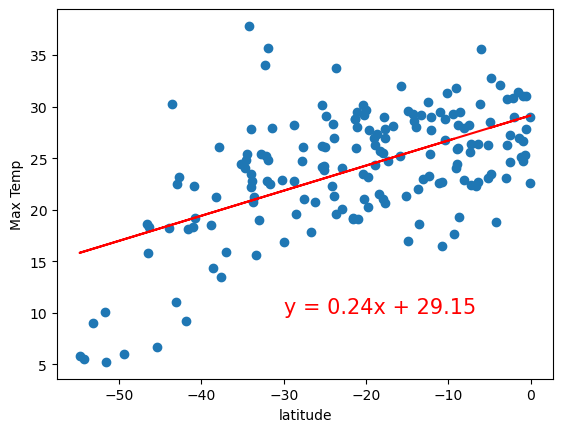

In [90]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"]

plt.scatter(x_values_south, y_values_south)
plt.xlabel("latitude")
plt.ylabel("Max Temp")

#calculating Linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values_south, y_values_south)
regress_values = slope*x_values_south + intercept

#creating line equation
line_eq_2 = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plotting the line 
plt.plot(x_values_south, regress_values, color = "red")
plt.annotate(line_eq_2, (-30,10), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

**Discussion about the linear relationship:** 
In Nothern Hemisphere, r-values indicates a positive correlation, indicating that the temperature increases when you get closer to equator.
In Southern Hemisphere also, r-values indicates a positive correlation, indicating that the temperature increases when you get closer to equator and vice versa.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.15240605635111917


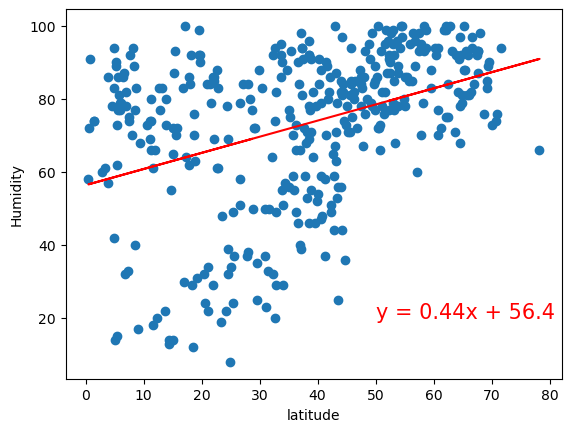

In [104]:
# Northern Hemisphere
x_values_3 = northern_hemi_df["Lat"]
y_values_3= northern_hemi_df["Humidity"]
plt.scatter(x_values_3, y_values_3)
plt.xlabel("latitude")
plt.ylabel("Humidity")
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values_3, y_values_3)
regress_values = (slope*x_values_3) + intercept
#creating line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
#plotting the line 
plt.plot(x_values_3, regress_values, color = "red")
plt.annotate(line_eq, (50,20), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

The r-value is : 0.10527004063316173


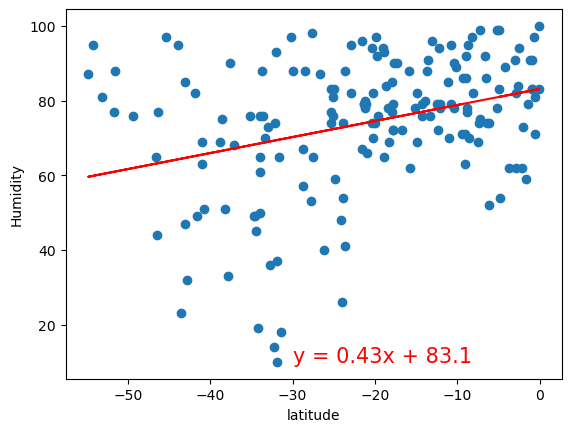

In [106]:
# Southern Hemisphere
x_values_4 = southern_hemi_df["Lat"]
y_values_4 = southern_hemi_df["Humidity"]

plt.scatter(x_values_4, y_values_4)
plt.xlabel("latitude")
plt.ylabel("Humidity")

#calculating Linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values_4, y_values_4)
regress_values = slope*x_values_4 + intercept

#creating line equation
line_eq= f"y = {round(slope,2)}x + {round(intercept,2)}"

#plotting the line 
plt.plot(x_values_4, regress_values, color = "red")
plt.annotate(line_eq, (-30,10), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

**Discussion about the linear relationship:** 
In Nothern Hemisphere,the correlation between Latitude and Humidity is positive, if the distance from the equator increases, humidity also increases
In Southern Hemisphere, the correlation is not strong as the r-value is close to 0, indicating very weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.09675303520861579


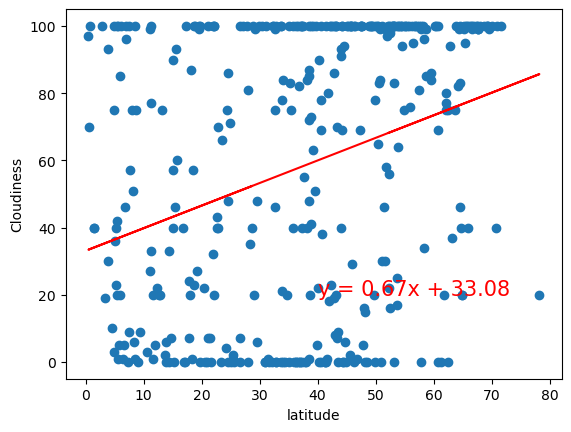

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("latitude")
plt.ylabel("Cloudiness")
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope*x_values + intercept
#creating line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
#plotting the line 
plt.plot(x_values, regress_values, color = "red")
plt.annotate(line_eq, (40,20), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

The r-value is : 0.06499601322201973


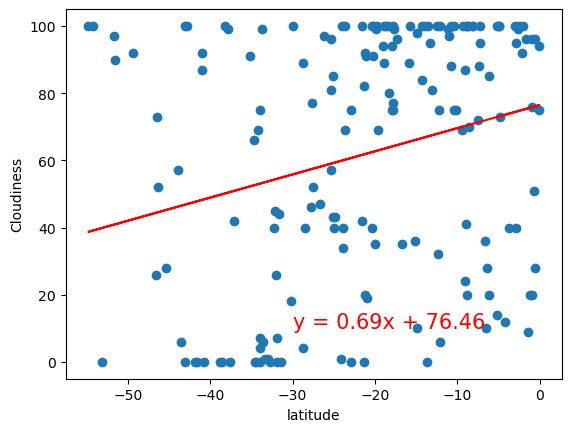

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("latitude")
plt.ylabel("Cloudiness")

#calculating Linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope*x_values + intercept

#creating line equation
line_eq= f"y = {round(slope,2)}x + {round(intercept,2)}"

#plotting the line 
plt.plot(x_values, regress_values, color = "red")
plt.annotate(line_eq, (-30,10), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

**Discussion about the linear relationship:** 
There is no correlation between Latitude and Clodiness both in nothern and southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 3.7032815580541476e-07


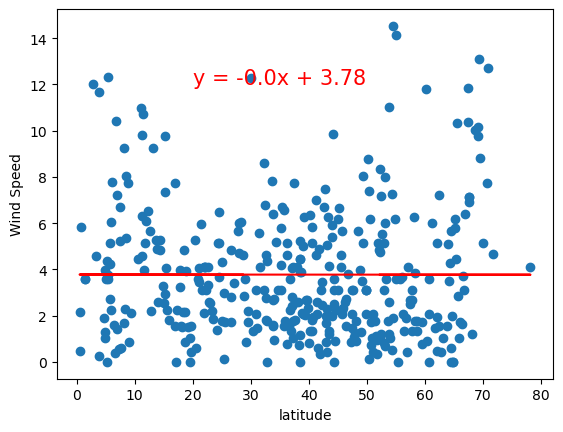

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
dropped_values_speed = northern_hemi_df["Wind Speed"].dropna()

y_values = dropped_values_speed
plt.scatter(x_values, y_values)
plt.xlabel("latitude")
plt.ylabel("Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope*x_values + intercept
#creating line equation
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
#plotting the line 
plt.plot(x_values, regress_values, color = "red")
plt.annotate(line_eq, (20,12), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

The r-value is : 0.1414103205609834


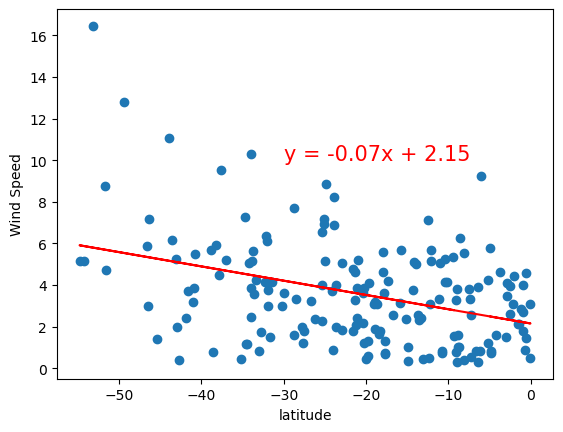

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("latitude")
plt.ylabel("Wind Speed")

#calculating Linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = slope*x_values + intercept

#creating line equation
line_eq= f"y = {round(slope,2)}x + {round(intercept,2)}"

#plotting the line 
plt.plot(x_values, regress_values, color = "red")
plt.annotate(line_eq, (-30,10), color = "red", fontsize = 15)

print(f"The r-value is : {rvalue**2}")

**Discussion about the linear relationship:** 
There is no correlation between Latitude and Wind speed in Nothern Hemisphere and in southern hemisphere, there is a slight indication of positive correlation